Project 1

# Base Ball Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/soma/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [70]:
# Accessing the Dataset

In [2]:
bb= pd.read_csv('baseball.csv')

In [3]:
bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# EDA

In [4]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
#descriptive statistics summary
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


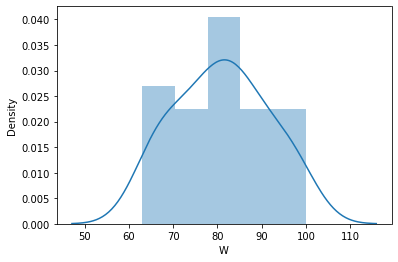

In [6]:
#histogram
sns.distplot(bb['W']);

In [7]:
#skewness and kurtosis
print("Skewness: %f" % bb['W'].skew())
print("Kurtosis: %f" % bb['W'].kurt())

Skewness: 0.047089
Kurtosis: -0.874262


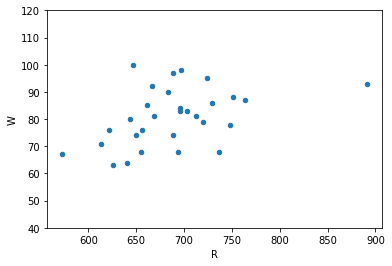

In [8]:
#scatter plot Run/win
var = 'R'
data = pd.concat([bb['W'], bb[var]], axis=1)
data.plot.scatter(x=var, y='W', ylim=(40,120));

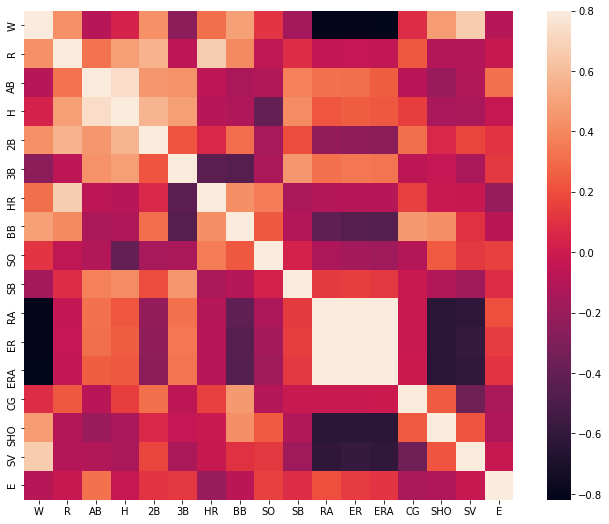

In [9]:
#correlation matrix
corrmat = bb.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

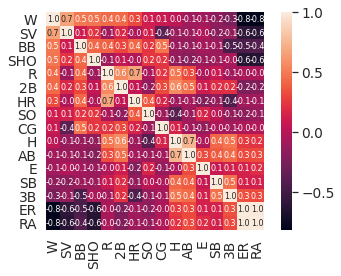

In [10]:
#saleprice correlation matrix
k = 16 #number of variables for heatmap
cols = corrmat.nlargest(k, 'W')['W'].index
cm = np.corrcoef(bb[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 8}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Dataset is already clean - WE can Directly Fit Model Now

In [86]:
# Instialzing Value for Model Training - 

In [87]:
#Base-Ball-Feature - Features of Dataset
bbf = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E']

In [88]:
x = bb[bbf] #Features
y = bb.W    #Output

# MultiLinear Regression  - Fitting Model Number 1.
#As we are dealing with numberical relation between 16 feature value and output value(total wins), 
So We can go with Multiple Linear Regression.

𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ ⋯ ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀 

Here, 
y = total win
x1,x2,x3,.....xr = Feature values 

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [90]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [91]:
#Intercept and Coefficientprint("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Coefficients:


[('R', 0.12427720499103104),
 ('AB', -0.015213332173473579),
 ('H', 0.00296356483071563),
 ('2B', -0.1475091540754775),
 ('3B', 0.10456254780799584),
 ('HR', -0.042197840389232424),
 ('BB', -0.022845791784713146),
 ('SO', 0.0007007058679254722),
 ('SB', 0.017023433233260766),
 ('RA', 0.2382293697823415),
 ('ER', -0.11050945117632419),
 ('ERA', -30.263167359740237),
 ('CG', 0.8955719509672775),
 ('SHO', 0.3037875739492748),
 ('SV', 0.9920904291730726),
 ('E', -0.08306064770037494)]

In [92]:
#Prediction of test set 
y_pred_mlr= mlr.predict(x_test)

In [93]:
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 84.93963025 102.95475508  70.26654993  97.85706825  90.89642411
  78.87053971  80.47469867  58.90569779]


In [94]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

In [95]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
Acc=mlr.score(x,y)*100
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 91.26
Mean Absolute Error: 4.419246025371816
Mean Square Error: 29.198703832222165
Root Mean Square Error: 5.4035824998071575


In [96]:
print('Accuracy For MLR :', round(Acc, 2), '%.')

Accuracy For MLR : 91.26 %.


# Random Forest Model - Fitting Model Number 2
Now the accuracy of previous model is 91% ,There a chance that we can get more accuracy from other models. So we will try with random forest model.

In [97]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [98]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [99]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3.8


In [100]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.58 %.


Best Fitting Model is Random Forest Model with 95.6% Accurracy. Afterward, Multiple Linear Regression with 91.3% Accuracy.

We can fit model like Decision Tree Classifier , KNN , Logistic Model And SVM . But Most of the Case , The Accuracy Will be Almost Zero. Because, They are more About Classification then Regression. But in our problem Statement , We are completely dealing with numberical values and their relation.
